# Trees and recursion

A *tree* is a data structures that consists of *nodes* at different levels. A tree can represent a hierarchy through connections between nodes of different levels.

Consider the following tree:

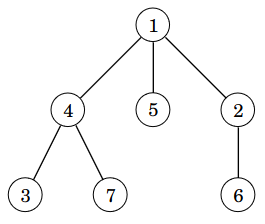

This tree has seven nodes at three levels.

The top-most node is called the ***root***. A *child* of a node is a lower level node connected to it. A node is the ***parent*** of its **children**. If a node has no children, it is a ***leaf***.

In the example, the root of the tree is the node 1. The children of the node 1 are the nodes 4, 5 and 2. The parent of the node 4 is the node 1. The leaves of the tree are the nodes, 3, 7, 5 and 6.

Every node except the root has exactly one parent. This means that any node can be reached from the root by following the node connections downwards, and there is always exactly one such way from the root to the node. The root has no parent.

The ***subtree*** of a node consists of all nodes that can be reached by following connections downwards from the node. In the example, the subtree of the node 1 contains all nodes of the tree, and the subtree of the node 4 contains the nodes 4, 3 and 7.

The ***depth*** of a node tells how low the node is in the tree. The depth of the root is 0, and the depth of any other node is one bigger than the depth of its parent. In the example, the depth of the node 1 is 0, the depth of the node 4 is 1, and the depth of the node 3 is 2.

The ***height*** of a tree is the maximum depth of any node in the tree. In the example, the height of the tree is 2, because 2 is the depth of the nodes 3, 7 and 6.

## Implementing a tree

We can represent a tree in Python using the following class `Node`:

In [1]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
        
    def __repr__(self):
        return str(self.value)  

The construction of a node takes two parameters: the value stored in the node and a list of the children of the node. If no list is given, it is empty by default. For example, the following code creates three nodes so that the nodes 2 and 3 are children of the node 1.

In [2]:
node2 = Node(2)
node3 = Node(3)
node1 = Node(1, [node2, node3])

The string representation of a node is the value in the node:

In [3]:
node = Node(1)
print(node) # 1

1


With this class, we can define a tree by building the root node of the tree. For example, the following code creates the example tree at the beginning of the chapter:

In [4]:
tree = Node(1, [Node(4, [Node(3), Node(7)]),
                Node(5),
                Node(2, [Node(6)])])

### Traversing a tree

A natural way to process a tree is using recursion. For example the following function `traverse` goes through all the nodes that are in the subtree of the node `node`:

In [5]:
def traverse(node):
    print(node)
    for child in node.children:
        traverse(child)

When the function is given a reference to the root of a tree, it traverses all the nodes in the tree:

In [6]:
traverse(tree)

1
4
3
7
5
2
6


Given the example tree, the function prints:
```bash
1
4
3
7
5
2
6
```

The function `traverse` starts by printing the value (`node.value`) of the given node. Then the function iterates through the children of the node (`node.children`) and calls itself recursively for each child.

We can further illustrate the operation of the function with the following modification:

In [7]:
def traverse(node):
    print("enter", node.value)
    for child in node.children:
        traverse(child)
    print("leave", node.value)

Now the function prints ”enter $x$”, when the processing of a node $x$ starts, and ”leave $x$”, when the processing of the node $x$ ends. For the example tree, the modified function prints:

```bash
enter 1
enter 4
enter 3
leave 3
enter 7
leave 7
leave 4
enter 5
leave 5
enter 2
enter 6
leave 6
leave 2
leave 1
```

## Computing information from a tree

Trees are often processed using recursive functions that compute some value related to the tree. As an example, let us consider a function `count_nodes` that counts how many nodes are in the subtree of the node `node`:

In [8]:
def count_nodes(node):
    result = 1
    for child in node.children:
        result += count_nodes(child)
    return result

The function can be used as follows:

In [9]:
tree = Node(1, [Node(4, [Node(3), Node(7)]),
                Node(5),
                Node(2, [Node(6)])])

print(count_nodes(tree)) # 7

7


The function computes the node count into the variable `result`. The initial value of the variable is 1, because it includes the node `node` itself. Then the function goes through the children of the node and recursively counts the nodes in the subtrees of the children.

Let us see how the function counts the nodes in the example:

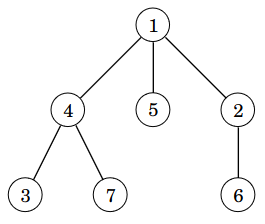

When the function is given the node 1, the variable `result` is initialized with 1, and then the node counts of the children are added to it. The children of the node 1 are the nodes 4, 5 and 2. The subtree of the node 4 has 3 nodes, the subtree of the node 5 has 1 node, and the subtree of the node 2 has 2 nodes. Thus 3, 1 and 2 are added to the variable `result` and the final node count is 1 + 3 + 1 + 2 = 7.

We can further illustrate the operation of the function by adding a print command:

In [10]:
def count_nodes(node):
    result = 1
    for child in node.children:
        result += count_nodes(child)
    print("subtree of node", node, "has", result, "nodes")
    return result

Now the function prints out the subtree node count for all nodes:

```bash
subtree of node 3 has 1 nodes
subtree of node 7 has 1 nodes
subtree of node 4 has 3 nodes
subtree of node 5 has 1 nodes
subtree of node 6 has 1 nodes
subtree of node 2 has 2 nodes
subtree of node 1 has 7 nodes
```

Many values related to trees can be computed using the same approach: define some variables, iterate through the children recursively, and update the variables appropriately. For example, the following function computes the height of the tree, i.e., the maximum depth of any node in the tree:

In [11]:
def count_height(node):
    result = 0
    for child in node.children:
        result = max(result, count_height(child) + 1)
    return result

In this case, the loop goes through the children and chooses the biggest subtree height incremented by one using the function `max`. In the example tree, the subtree heights of the children of the node 1 are 1, 0 and 1. The biggest height is 1, and with the addition of 1, the resulting subtree height of the node 1 is 2.

## Computing depths

Sometimes it is useful to add a parameter to the recursive function to keep track of the depth of a node. For example, the following function prints out the depth of every node:

In [ ]:
def traverse(node, depth):
    print("node", node, "depth", depth)
    for child in node.children:
        traverse(child, depth + 1)

The initial call of the function is given the root of the tree and the depth 0, and each step deeper in the tree increments the depth by one. The function can be used as follows:

In [ ]:
tree = Node(1, [Node(4, [Node(3), Node(7)]),
                Node(5),
                Node(2, [Node(6)])])

traverse(tree, 0)

In this case, the output is:

```bash
node 1 depth 0
node 4 depth 1
node 3 depth 2
node 7 depth 2
node 5 depth 1
node 2 depth 1
node 6 depth 2
```

Let us next design a more complicated function `get_depths` that returns the node depths as a list ordered from the smallest to the biggest depth. With the example tree, the function should return the list `[0, 1, 1, 1, 2, 2, 2]`. A good way to implement a function like this is to define a helper function that has more parameters:

In [12]:
def get_depths(node):
    depths = []
    get_depths_helper(node, 0, depths)
    return sorted(depths)
    
def get_depths_helper(node, depth, depths):
    depths.append(depth)
    for child in node.children:
        get_depths_helper(child, depth + 1, depths)

The function operates as follows:

In [13]:
tree = Node(1, [Node(4, [Node(3), Node(7)]),
                Node(5),
                Node(2, [Node(6)])])

print(get_depths(tree)) # [0, 1, 1, 1, 2, 2, 2]

[0, 1, 1, 1, 2, 2, 2]


The function `get_depths` first creates a list `depths` for storing the depths. Then the function calls the helper function `get_depth_helper` that adds all the depths to the list. Finally the function `get_depths` sorts and returns the list.

The function `get_depths_helper` has two additional paramaters: the parameter `depth`, which keeps track of the depth of the current node, and the parameter `depths`, which is a reference to the list of depths. Notice that, since Python passes lists by reference, all the depths are added to the same list defined in the function `get_depth`. This way we can collect data from different function calls to the same list.

Below is another way to implement the two functions. This time the function `get_depths_helper` does not get the list as a parameter but returns the list:

In [ ]:
def get_depths(node):
    return sorted(get_depths_helper(node, 0))

def get_depths_helper(node, depth):
    depths = [depth]
    for child in node.children:
        depths += get_depths_helper(child, depth + 1)
    return depths

Now the function `get_depths_helper` creates a list initially containing the depth of the current node. Then the function computes the lists for the child subtrees recursively and adds those lists into its own list. The function `get_depths` gets the list of depths from the helper function and returns it in sorted order.

## Improving the class

Let us return to the definition of the class `Node`:

In [ ]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
        
    def __repr__(self):
        return str(self.value)  

As we have seen, the class works well in many cases, but there is feature of Python that can cause problems in some cases. The following code illustrates this:

In [ ]:
node1 = Node(1)
node2 = Node(2)

node1.children.append(node2)

print(node1.children) # [2]
print(node2.children) # [2]

Here we create two nodes without children and then add the node 2 as a child of the node 1. Surprisingly, this has the effect of adding the node 2 as its own child too.

This effect is caused by the default parameter `[]`, which is created only once and *shared* between all calls of the method. Thus both nodes refer to the same empty list and any additions to the list are seen by both nodes.

We can fix the issue by modifying the constructor as follows:

In [ ]:
class Node:
    def __init__(self, value, children=None):
        self.value = value
        self.children = children if children else []
        
    def __repr__(self):
        return str(self.value)   

Now the default value of the parameter `children` is `None`. If no parameter is supplied, the method creates an empty list. After this modification, each node gets its own empty list and the code works as expected:

In [ ]:
node1 = Node(1)
node2 = Node(2)

node1.children.append(node2)

print(node1.children) # [2]
print(node2.children) # []

A second issue with the class is that printing a node prints only the node value and no information about its children:

In [ ]:
tree = Node(1, [Node(2, [Node(3), Node(4)]), Node(5)])
print(tree) # 1

As a principle in Python, the method `__repr__` should return a string that can be used for constructing the object. This is not the case with the above method `__repr__`.

We can fix this as follows:

In [14]:
class Node:
    def __init__(self, value, children=None):
        self.value = value
        self.children = children if children else []
        
    def __repr__(self):
        if self.children == []:
            return f"Node({self.value})"
        else:
            return f"Node({self.value}, {self.children})"

Now printing a node outputs a string that includes all the nodes in the child subtrees too and that could be used for creating the object:

In [15]:
tree = Node(1, [Node(2, [Node(3), Node(4)]), Node(5)])
print(tree) # Node(1, [Node(2, [Node(3), Node(4)]), Node(5)])

Node(1, [Node(2, [Node(3), Node(4)]), Node(5)])


## Example: Employees

Trees can be used for representing hierarchical structures. For example, the personel structure of an organization could be represented as a tree, where each employee is a node, and the children of the node are the subordinates of the employee.

The following class can be used for storing the name of an employee and a list of the employee’s subordinates:

In [16]:
class Employee:
    def __init__(self, name, subordinates=[]):
        self.name = name
        self.subordinates = subordinates
        
    def __repr__(self):
        return self.name

The class can be used as follows:

In [17]:
def list_employees(employee, level=0):
    print(" "*(level*4), employee)
    for subordinate in employee.subordinates:
        list_employees(subordinate, level + 1)

staff = Employee("Emilia",
                 [
                    Employee("Antti"),
                    Employee("Leena", [Employee("Jussi")]),
                    Employee("Matti", [Employee("Sasu")])
                 ])

list_employees(staff)

 Emilia
     Antti
     Leena
         Jussi
     Matti
         Sasu


The output of the code is as follows:

```bash
Emilia
    Antti
    Leena
        Jussi
    Matti
        Sasu
```

## Example: Queens

A systematic iteration of possible solutions to a problem can often be seen as a traversal of a tree. This technique of solving a problem is knowns as *backtracking*. Let us consider the following problem as an example:

**Task**

How many ways can you place $n$ queens on an $n \times n$ chess board so that no two queens attack each other? Two queens attack each other if they are on the same row, column or diagonal.

For example, when $n=4$, there are $2$ solutions:

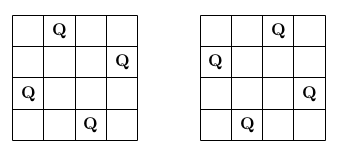

We can solve the task by traversing a tree, where the root represents an empty board. Each non-root node represents a board obtained by modifiying the board of its parent by adding one more queen to an empty row. The following image shows a part of the tree corresponding to the case $n=4$:

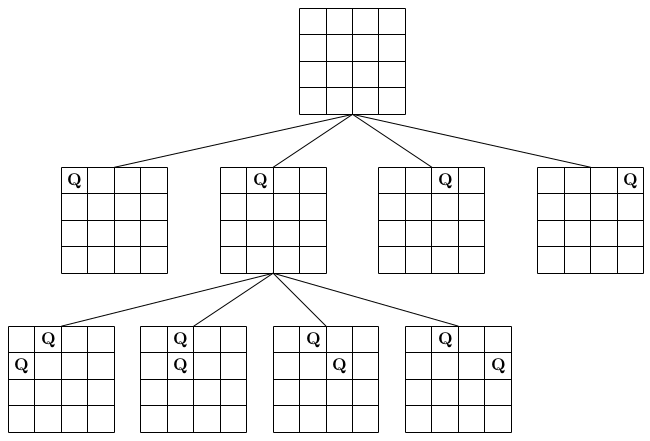

By traversing the tree, we will encounter all the valid solutions with $n$ queens that do not attack each other, and we can count them. We will also encounter invalid solutions, where two queens attack each other, and partial solutions with less than $n$ queens. The invalid solutions are discarded and the partial solutions are extended by adding more queens. Notice that the tree is never stored explicitly in memory but is build during the traversal.

The following code implements the traversal:

In [1]:
def count_queens(n):
    return count(n, 0, [])

def count(n, row, queens):
    if row == n:
        return 1
    result = 0
    for col in range(n):
        attacks = [attack(queen, (row, col)) for queen in queens]
        if not any(attacks):
            result += count(n, row + 1, queens + [(row, col)])
    return result

def attack(queen1, queen2):
    if queen1[0] == queen2[0] or queen1[1] == queen2[1]:
        return True
    if abs(queen1[0] - queen2[0]) == abs(queen1[1] - queen2[1]):
        return True
    return False

print(count_queens(2)) # 0
print(count_queens(4)) # 2
print(count_queens(8)) # 92

0
2
92


The function `count` is given three parameters: the size of the board, the next empty row and the list of queens already placed on the board. The rows and columns are numbered $0 \dots n-1$ and the queens are represented as pairs $(y,x)$, where $y$ is the row and $x$ is the column of the queen’s location. The function goes through all the columns, checks if a new queen can be placed at the column without attacking any other queens, and if it can, processes that placement recursively.

The function `attack` handles the attack checks. The condition on the first line checks if the two queens are on the same row or the same column. The second condition checks if the queens attack each other diagonally: they do if their horizontal and vertical coordinates differ by the same amount.

The function `any` in the code returns `True` if the given list contains `True` at least once. Thus `not any(attacks)` means that the list `attacks` contains only `False` values, i.e., that the new queen attacks none of the previously placed queens.